Open and Sort

In [12]:
import pandas as pd
import numpy as np

#open
db = pd.read_csv("data\\1raw\\Animal Dataset.csv")

#remove entry with missing data
db.replace("Not Evaluated", pd.NA, inplace=True)
db.replace("Not Applicable", pd.NA, inplace=True)

#function to replace valuz with there average or their value 
def replace_range_with_average(value):
    try :
        if "Up to" in value:
            value = value.replace("Up to ", "")
            try:
                value = float(value)
                return value
            except :
                return value
    except :
        pass
    if isinstance(value, str) and '-' in value:
        parts = value.split('-')
        try:
            numbers = [float(part.replace(",", "").strip()) for part in parts]
            return np.mean(numbers)
        except ValueError:
            return value 
    return value

#run the function on the data of db
db = db.applymap(replace_range_with_average)

#remove empty
db.dropna(inplace=True)

print(db)

                  Animal Height (cm) Weight (kg)             Color  \
0               Aardvark       117.5        52.5              Grey   
1               Aardwolf        45.0        11.0      Yellow-brown   
2       African Elephant       290.0      4350.0              Grey   
3           African Lion        95.0       185.0               Tan   
4       African Wild Dog        77.5        27.0      Multicolored   
..                   ...         ...         ...               ...   
197               Wombat       101.0        27.5       Brown, Gray   
200                  Yak       150.0       850.0      Brown, Black   
201  Yellow-Eyed Penguin        62.5         2.0     Yellow, White   
203                Zebra       280.0       650.0      Black, White   
204          Zebra Shark       330.0        32.0  Brown, Yellowish   

    Lifespan (years)         Diet               Habitat  \
0               25.0  Insectivore  Savannas, Grasslands   
1               11.0  Insectivore  Grassl

C:\Users\perei\AppData\Local\Temp\ipykernel_29564\3644807234.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  db = db.applymap(replace_range_with_average)


most common family

Family
Bovidae            10
Felidae             9
Canidae             9
Hominidae           9
Ursidae             5
                   ..
Pitheciidae         1
Odobenidae          1
Mustelidae          1
Vombatidae          1
Stegostomatidae     1
Name: count, Length: 84, dtype: int64


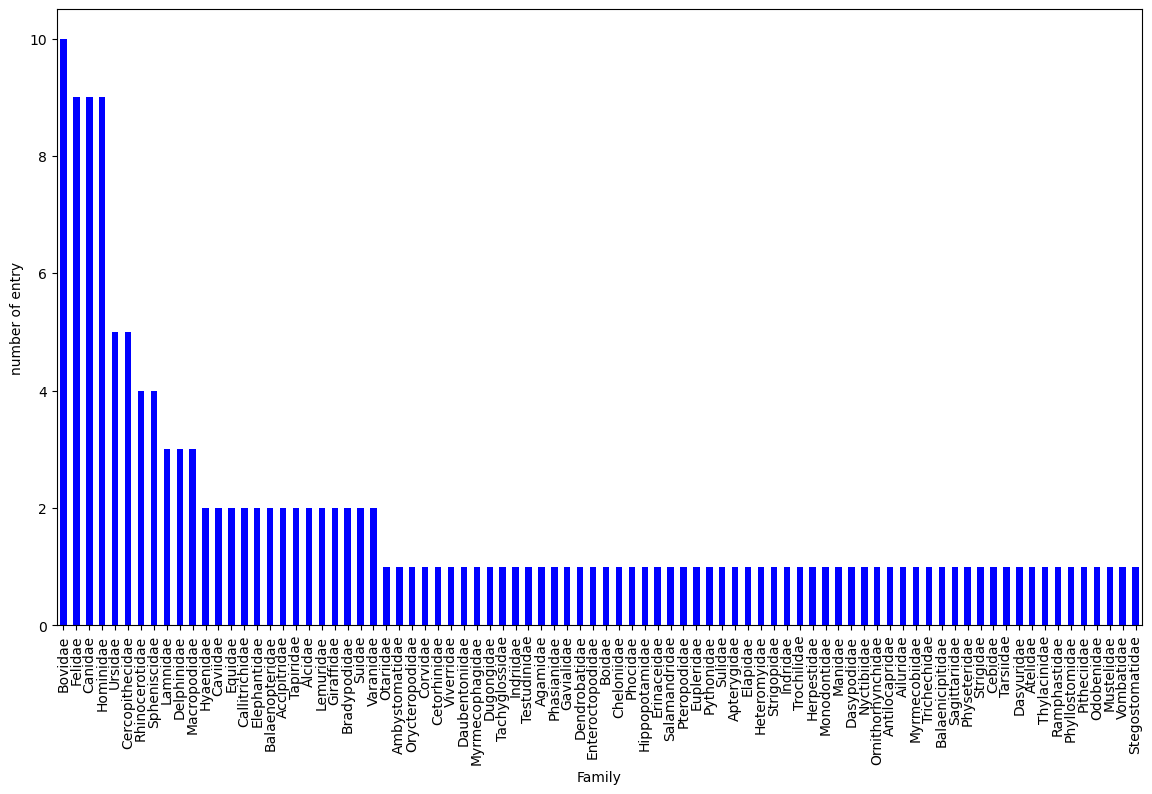

In [18]:
db = pd.read_csv("data\\2interim\\treated_annimal_dataset.csv")

family = db['Family'].value_counts().sort_values(ascending=False)

print(family)

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

family.plot(kind='bar', color="blue")

plt.xlabel("Family")
plt.ylabel("number of entry")

plt.show()

Endenger wheel in percent

In [ ]:
endangered_statuses = ['Endangered', 'Critically Endangered']

endanger_percent=db['Conservation Status'].isin(endangered_statuses)



Endanger per Family

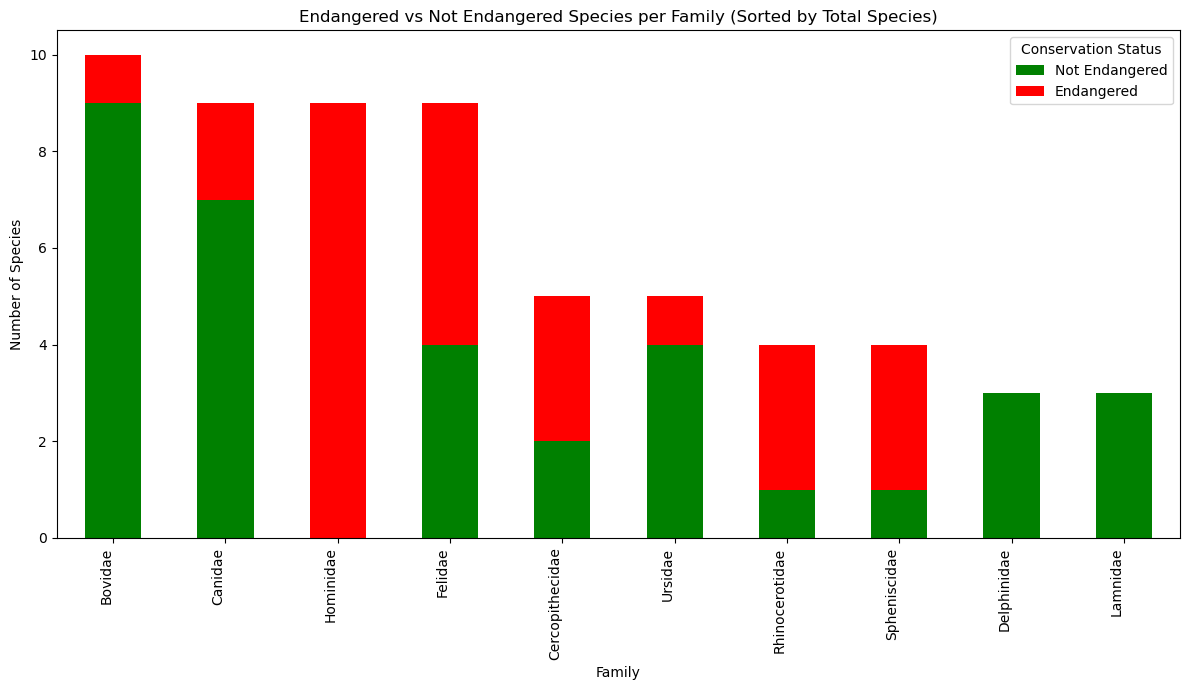

In [36]:
endangered_statuses = ['Endangered', 'Critically Endangered']

db['Endangered'] = db['Conservation Status'].isin(endangered_statuses)

family_counts = db.groupby('Family')['Endangered'].value_counts().unstack(fill_value=0)

family_counts.columns = ['Not Endangered', 'Endangered']

family_counts['Total'] = family_counts['Not Endangered'] + family_counts['Endangered']
family_counts = family_counts.sort_values(by='Total', ascending=False).head(10)

family_counts = family_counts.drop(columns=['Total'])

family_counts.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 7))

plt.title('Endangered vs Not Endangered Species per Family (Sorted by Total Species)')
plt.xlabel('Family')
plt.ylabel('Number of Species')
plt.legend(title='Conservation Status')

plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

